In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean
import matplotlib as mpl

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

In [4]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'
PATH_64x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_rejigged_fulltile/'
PATH_32x17 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile_64pxwindow/'
PATH_32x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile/'

In [5]:
no_files = len(os.listdir(PATH_32x17+'DataCubes'))
no_files

163

100%|██████████████████████████████████████| 163/163 [05:30<00:00,  2.03s/it]


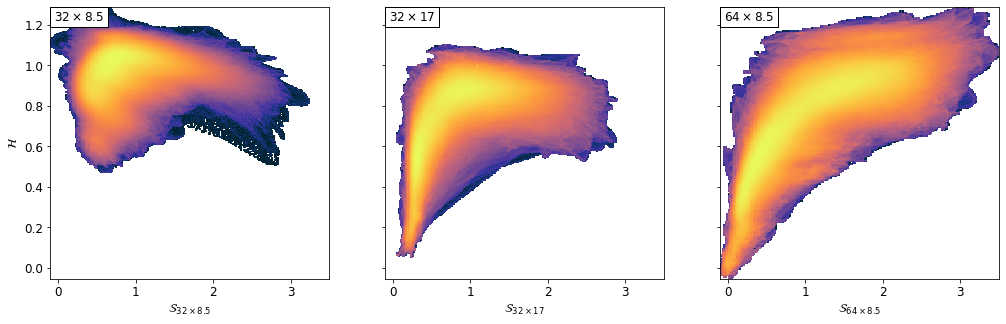

In [6]:
plt.rcParams.update({'font.size': 12})
f,ax = plt.subplots(1,3, figsize=(17,5), sharex = True, sharey = True)

x = 0.015
y = 0.95

df = pd.DataFrame(columns = ['H_32x85','S_32x85'])
for i in tqdm(range(no_files)):
    
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['H_32x85'] = np.pad(cube_32x85[1],((16,15),(16,15)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x85'] = np.pad(cube_32x85[2],((16,15),(16,15)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[0].hist2d(df['S_32x85'],df['H_32x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0].set_xlabel(r'$\mathcal{S}_{32\times 8.5}$')
ax[0].set_ylabel(r'$\mathcal{H}}$')
ax[0].text(x, y, r'$32\times 8.5$', transform=ax[0].transAxes,bbox = dict(facecolor='white'))

df = pd.DataFrame(columns = ['H_32x17','S_32x17'])
for i in tqdm(range(no_files)):
    
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['H_32x17'] = np.pad(cube_32x17[1],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x17'] = np.pad(cube_32x17[2],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)
    
ax[1].hist2d(df['S_32x17'],df['H_32x17'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1].set_xlabel(r'$\mathcal{S}_{32\times 17}$')
ax[1].text(x, y, r'$32\times 17$', transform=ax[1].transAxes,bbox = dict(facecolor='white'))

df = pd.DataFrame(columns = ['H_64x85','S_64x85'])
for i in tqdm(range(no_files)):
    
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))
    
    temp_df = pd.DataFrame()
    temp_df['H_64x85'] = np.pad(cube_64x85[1],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_64x85'] = np.pad(cube_64x85[2],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[2].hist2d(df['S_64x85'],df['H_64x85'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[2].set_xlabel(r'$\mathcal{S}_{64\times 8.5}$')
ax[2].text(x, y, r'$64\times 8.5$', transform=ax[2].transAxes,bbox = dict(facecolor='white'))    

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/HvS.png',bbox_inches="tight")
plt.show()